I investigated three strategies to make PCA more robust:
- *Preprocessing techniques (scaling the data)*: `MinMaxScaler` and `StandardScaler`.
- *Transforming the data vectors more robust*: `RobustScaler`
- *Robust generalization of variance maximization*: Minimum Determinant of Covariance (MCD) `MinCovDet`

Below is the implementation of each

In [1]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.covariance import MinCovDet
from sklearn.preprocessing import  MinMaxScaler
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

# Load MNIST dataset
X, y  = fetch_openml(data_id=554, parser='auto', return_X_y=True) # https://www.openml.org/d/554

# Select only 0s and 8s
num=['0','8']
y1 = y.isin(num)
indices = y1[y1].index
X = X.loc[indices]
y = y.loc[indices]

# Reset index after class selection
X.reset_index(inplace=True, drop=True)
y.reset_index(inplace=True, drop=True)

# Scaling the data using MinMaxScaler()
mm_scaler = MinMaxScaler().fit(X)
X_mm = mm_scaler.transform(X)

# Scaling the data using StandardScaler()
ss_scaler = StandardScaler().fit(X)
X_ss = ss_scaler.transform(X)

# Transforming the data vectors more robust using RobustScaler()
rs_scaler = RobustScaler().fit(X)
X_rs = rs_scaler.transform(X)

# Robust generalization of variance maximization using Minimum Determinant of Covariance (MCD) MinCovDet()
#mcd = MinCovDet().fit(X)
#X_mcd = mcd.transform(X)

# Split into training and test
X_mm_train, X_mm_test, y_mm_train, y_mm_test = train_test_split(X_mm, y, test_size=0.2, random_state=42)
X_ss_train, X_ss_test, y_ss_train, y_ss_test = train_test_split(X_ss, y, test_size=0.2, random_state=42)
X_rs_train, X_rs_test, y_rs_train, y_rs_test = train_test_split(X_rs, y, test_size=0.2, random_state=42)
#X_mcd_train, X_mcd_test, y_mcd_train, y_mcd_test = train_test_split(X_mcd, y, test_size=0.2, random_state=42)

## PCA more robust with MinMaxScaler()

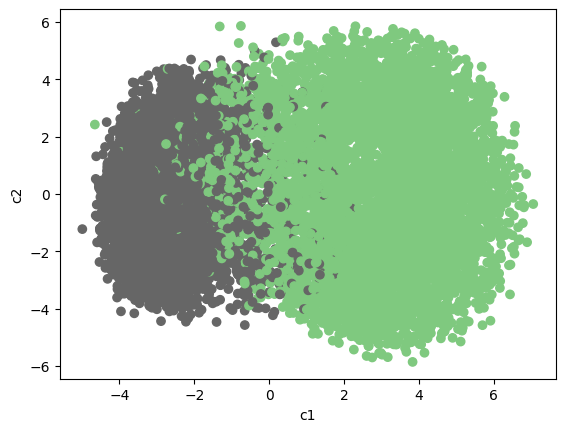

In [2]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_mm_train)
X_test_pca = pca.transform(X_mm_test)

# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_mm_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [3]:
# Train logistic regression on reduced dataset
clf1 = LogisticRegression(random_state=0).fit(X_train_pca, y_mm_train)

# Test score
score1 = clf1.score(X_test_pca, y_mm_test)

# Confusion matrix
predictions1 = clf1.predict(X_test_pca)
cm1 = metrics.confusion_matrix(y_true=y_mm_test, y_pred=predictions1, labels=clf1.classes_)
print('Confusion Matrix:', "\n", cm1, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr1 = metrics.classification_report(y_mm_test, predictions1, target_names=clf1.classes_)
print('Classification Report:', "\n", cr1)

Confusion Matrix: 
 [[1309   76]
 [  50 1311]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      1385
           8       0.95      0.96      0.95      1361

    accuracy                           0.95      2746
   macro avg       0.95      0.95      0.95      2746
weighted avg       0.95      0.95      0.95      2746



## PCA more robust with StandardScaler()

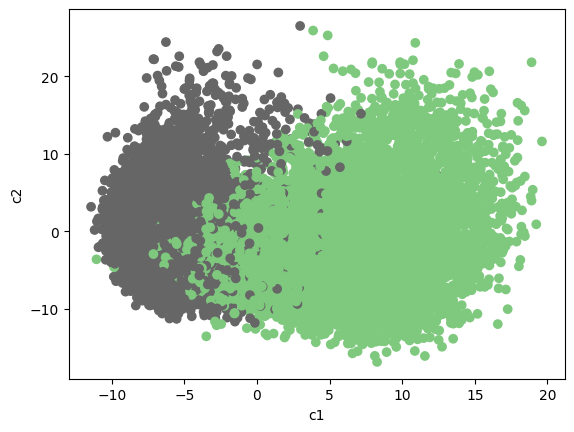

In [4]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_ss_train)
X_test_pca = pca.transform(X_ss_test)

# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_ss_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [5]:
# Train logistic regression on reduced dataset
clf1 = LogisticRegression(random_state=0).fit(X_train_pca, y_ss_train)

# Test score
score1 = clf1.score(X_test_pca, y_ss_test)

# Confusion matrix
predictions1 = clf1.predict(X_test_pca)
cm1 = metrics.confusion_matrix(y_true=y_ss_test, y_pred=predictions1, labels=clf1.classes_)
print('Confusion Matrix:', "\n", cm1, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr1 = metrics.classification_report(y_ss_test, predictions1, target_names=clf1.classes_)
print('Classification Report:', "\n", cr1)

Confusion Matrix: 
 [[1295   90]
 [  65 1296]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.94      0.94      1385
           8       0.94      0.95      0.94      1361

    accuracy                           0.94      2746
   macro avg       0.94      0.94      0.94      2746
weighted avg       0.94      0.94      0.94      2746



## PCA more robust with RobustScaler()

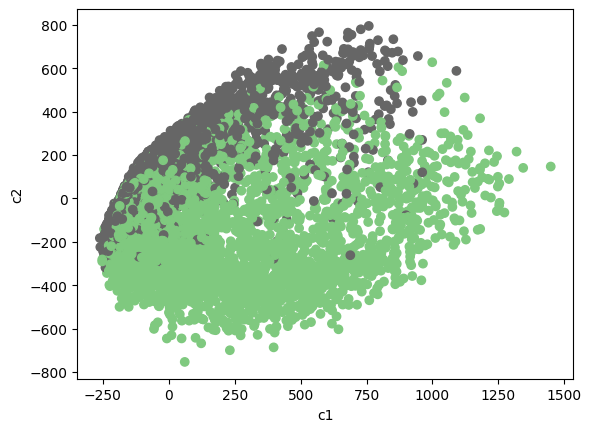

In [6]:
# Apply PCA with 2 components
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_rs_train)
X_test_pca = pca.transform(X_rs_test)

# Plot the 2 new features generated by PCA
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], c=y_rs_train.astype('int32'), cmap='Accent')
plt.xlabel('c1')
plt.ylabel('c2')
plt.show()

In [7]:
# Train logistic regression on reduced dataset
clf1 = LogisticRegression(random_state=0).fit(X_train_pca, y_rs_train)

# Test score
score1 = clf1.score(X_test_pca, y_rs_test)

# Confusion matrix
predictions1 = clf1.predict(X_test_pca)
cm1 = metrics.confusion_matrix(y_true=y_rs_test, y_pred=predictions1, labels=clf1.classes_)
print('Confusion Matrix:', "\n", cm1, "\n"*2)

# Evaluate the model using classification_report for accuracy, precision, and recall
cr1 = metrics.classification_report(y_rs_test, predictions1, target_names=clf1.classes_)
print('Classification Report:', "\n", cr1)

Confusion Matrix: 
 [[ 755  630]
 [ 173 1188]] 


Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.55      0.65      1385
           8       0.65      0.87      0.75      1361

    accuracy                           0.71      2746
   macro avg       0.73      0.71      0.70      2746
weighted avg       0.73      0.71      0.70      2746



### Conclusions:
- We fitted the data by applying the different strategies to make a more robust PCA.
- The results of each strategy are compared with the results of the PCA of **point7** to know if there was or not an improvement in the result:
    - Fitting the data with **MinMaxScaler()** the results are exactly the same.
    - Fitting the data with **StandardScaler()** the accuracy decreased 1pp.
    - Fitting the data with **RobustScaler()** the accuracy dropped almost 24pp, affected mainly by the class '8' which went from 95% to 65% accuracy.
    - Due to lack of computational resources it was not possible to implement the data fitting with **MinCovDet()**.
- It seems that for this specific dataset, none of the strategies improves the model performance and on the contrary some of them worsen it. It would be important to validate in different iterations if there are any hyperparameter(s) that could improve the results.
